# Car Prediction with Implementation

In [1]:
#Importing the Libraries

import numpy as npy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#Import the DataSet

dt = pd.read_csv('car data.csv')
dt.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
dt.shape

(301, 9)

## Finding the Missing Values

In [5]:
dt.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

## Finding the Category Features
    1. Fuel_Type
    2. Seller_Type
    3. Owner
    4. Transmission

In [10]:
print(dt['Seller_Type'].unique())
print(dt['Fuel_Type'].unique())
print(dt['Owner'].unique())
print(dt['Transmission'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
[0 1 3]
['Manual' 'Automatic']


## Information About the DataSet

In [11]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### Observations:
         Car_Name, Fuel_Type, Seller_Type, Transmission are in 'Object'

In [12]:
dt['Current_Year']=2022

In [13]:
dt.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022


In [14]:
dt['No_of_Years'] = dt['Current_Year']-dt['Year']
dt.head(100)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2022,8
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2022,9
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2022,5
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2022,11
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2022,8


In [64]:
dt.head(100)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,0,1,0,8
1,4.75,9.54,43000,Diesel,0,1,0,9
2,7.25,9.85,6900,Petrol,0,1,0,5
3,2.85,4.15,5200,Petrol,0,1,0,11
4,4.60,6.87,42450,Diesel,0,1,0,8
...,...,...,...,...,...,...,...,...
95,5.85,18.61,72000,Petrol,0,1,0,10
96,20.75,25.39,29000,Diesel,0,0,0,6
97,17.00,18.64,8700,Petrol,0,1,0,5
98,7.05,18.61,45000,Petrol,0,1,0,9


In [61]:
dt.drop(['Car_Name','Year','Current_Year'], axis=1,inplace=True)


KeyError: "['Car_Name', 'Year', 'Current_Year'] not found in axis"

In [62]:
dt.head(100)

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,0,1,0,8
1,4.75,9.54,43000,Diesel,0,1,0,9
2,7.25,9.85,6900,Petrol,0,1,0,5
3,2.85,4.15,5200,Petrol,0,1,0,11
4,4.60,6.87,42450,Diesel,0,1,0,8
...,...,...,...,...,...,...,...,...
95,5.85,18.61,72000,Petrol,0,1,0,10
96,20.75,25.39,29000,Diesel,0,0,0,6
97,17.00,18.64,8700,Petrol,0,1,0,5
98,7.05,18.61,45000,Petrol,0,1,0,9


## Convert Categorical Features into Model Learning data

In [63]:
Transmission=pd.get_dummies(dt['Transmission'], drop_first=True)
Transmission.head(100)

,1
0,1
1,1
2,1
3,1
4,1
...,...
95,1
96,0
97,1
98,1


In [17]:
dt.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,1,0,8
1,4.75,9.54,43000,Diesel,Dealer,1,0,9
2,7.25,9.85,6900,Petrol,Dealer,1,0,5
3,2.85,4.15,5200,Petrol,Dealer,1,0,11
4,4.60,6.87,42450,Diesel,Dealer,1,0,8


In [23]:

Seller_Type=pd.get_dummies(dt['Seller_Type'], drop_first=True)

In [24]:
Seller_Type

,1
0,0
1,0
2,0
3,0
4,0
...,...
296,0
297,0
298,0
299,0


In [26]:
Fuel_Type = pd.get_dummies(dt['Fuel_Type'],drop_first=True)
Fuel_Type

,Diesel,Petrol
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
...,...,...
296,1,0
297,0,1
298,0,1
299,1,0


In [28]:
final_df = pd.concat([dt, Transmission,Seller_Type,Fuel_Type], axis=1)
final_df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years,1,1,Diesel,Petrol
0,3.35,5.59,27000,Petrol,0,1,0,8,1,0,0,1
1,4.75,9.54,43000,Diesel,0,1,0,9,1,0,1,0
2,7.25,9.85,6900,Petrol,0,1,0,5,1,0,0,1
3,2.85,4.15,5200,Petrol,0,1,0,11,1,0,0,1
4,4.60,6.87,42450,Diesel,0,1,0,8,1,0,1,0


In [29]:
final_df.columns

Index(['Selling_Price', 'Present_Price',    'Kms_Driven',     'Fuel_Type',
         'Seller_Type',  'Transmission',         'Owner',   'No_of_Years',
                     1,               1,        'Diesel',        'Petrol'],
      dtype='object')

In [30]:
final_df.drop(['1','1'], axis=1, inplace=True)
final_df.head()

KeyError: "['1' '1'] not found in axis"

In [32]:
td = final_df[['Selling_Price', 'Present_Price', 'Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner','No_of_Years','Diesel','Petrol']]

In [33]:
td.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years,Diesel,Petrol
0,3.35,5.59,27000,Petrol,0,1,0,8,0,1
1,4.75,9.54,43000,Diesel,0,1,0,9,1,0
2,7.25,9.85,6900,Petrol,0,1,0,5,0,1
3,2.85,4.15,5200,Petrol,0,1,0,11,0,1
4,4.60,6.87,42450,Diesel,0,1,0,8,1,0


In [34]:
td.drop('Fuel_Type', axis=1, inplace=True)
td.head()

C:\Users\Admin\AppData\Local\Temp\ipykernel_6708\4154381540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  td.drop('Fuel_Type', axis=1, inplace=True)


,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,No_of_Years,Diesel,Petrol
0,3.35,5.59,27000,0,1,0,8,0,1
1,4.75,9.54,43000,0,1,0,9,1,0
2,7.25,9.85,6900,0,1,0,5,0,1
3,2.85,4.15,5200,0,1,0,11,0,1
4,4.60,6.87,42450,0,1,0,8,1,0


In [35]:
td.corr()

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,No_of_Years,Diesel,Petrol
Selling_Price,1.000000,0.878983,0.029187,-0.550724,-0.367128,-0.088344,-0.236141,0.552339,-0.540571
Present_Price,0.878983,1.000000,0.203647,-0.512030,-0.348715,0.008057,0.047584,0.473306,-0.465244
Kms_Driven,0.029187,0.203647,1.000000,-0.101419,-0.162510,0.089216,0.524342,0.172515,-0.172874
Seller_Type,-0.550724,-0.512030,-0.101419,1.000000,0.063240,0.124269,0.039896,-0.350467,0.358321
Transmission,-0.367128,-0.348715,-0.162510,0.063240,1.000000,-0.050316,-0.000394,-0.098643,0.091013
Owner,-0.088344,0.008057,0.089216,0.124269,-0.050316,1.000000,0.182104,-0.053469,0.055687
No_of_Years,-0.236141,0.047584,0.524342,0.039896,-0.000394,0.182104,1.000000,-0.064315,0.059959
Diesel,0.552339,0.473306,0.172515,-0.350467,-0.098643,-0.053469,-0.064315,1.000000,-0.979648
Petrol,-0.540571,-0.465244,-0.172874,0.358321,0.091013,0.055687,0.059959,-0.979648,1.000000


<AxesSubplot: >

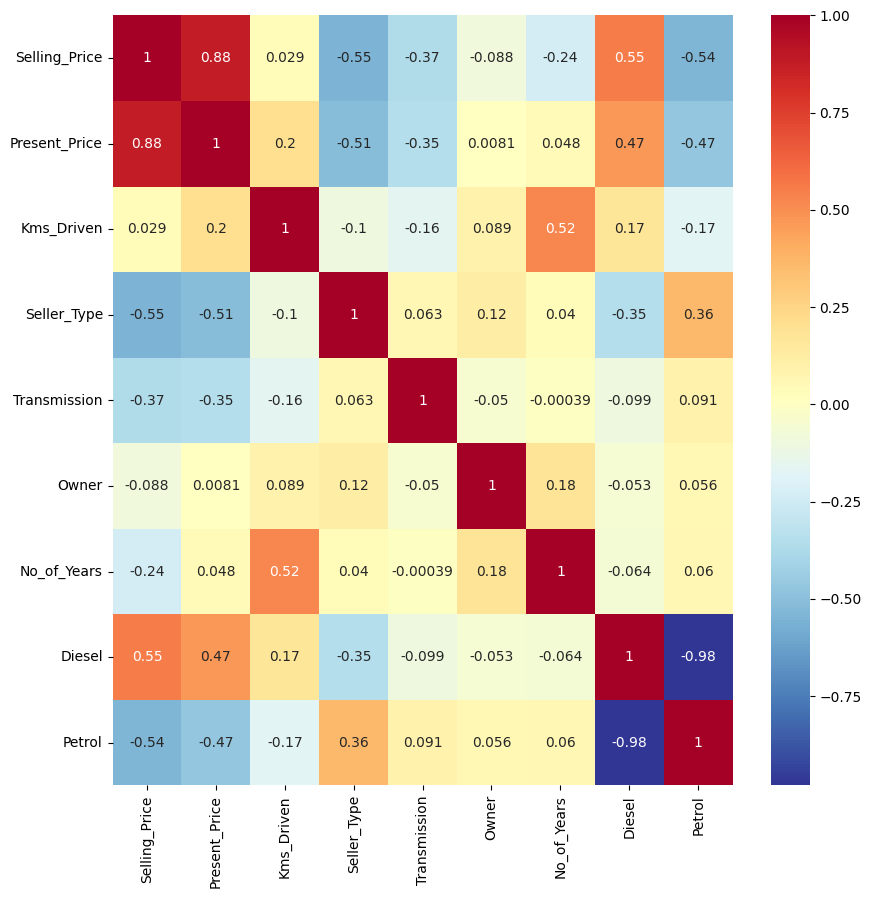

In [41]:
#Visualize the Correlation

plt.figure(figsize=(10,10))
sns.heatmap(td.corr(), annot=True, cmap='RdYlBu_r')

In [42]:
td.head()

,Selling_Price,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,No_of_Years,Diesel,Petrol
0,3.35,5.59,27000,0,1,0,8,0,1
1,4.75,9.54,43000,0,1,0,9,1,0
2,7.25,9.85,6900,0,1,0,5,0,1
3,2.85,4.15,5200,0,1,0,11,0,1
4,4.60,6.87,42450,0,1,0,8,1,0


In [44]:
#Here SP is my Dependent Features and remaining all are Independent Features
### Creating and X and y Values for creating model


X=td.iloc[:,1:]
y=td.iloc[:,0]

In [45]:
X.head()

,Present_Price,Kms_Driven,Seller_Type,Transmission,Owner,No_of_Years,Diesel,Petrol
0,5.59,27000,0,1,0,8,0,1
1,9.54,43000,0,1,0,9,1,0
2,9.85,6900,0,1,0,5,0,1
3,4.15,5200,0,1,0,11,0,1
4,6.87,42450,0,1,0,8,1,0


In [46]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [47]:
# Train Test Split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.3, random_state=42)

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [50]:
print(model.feature_importances_)

[3.86682029e-01 4.19977892e-02 1.15740464e-01 1.45486453e-01
 3.62813368e-04 7.68585899e-02 2.25087567e-01 7.78429397e-03]


<AxesSubplot: >

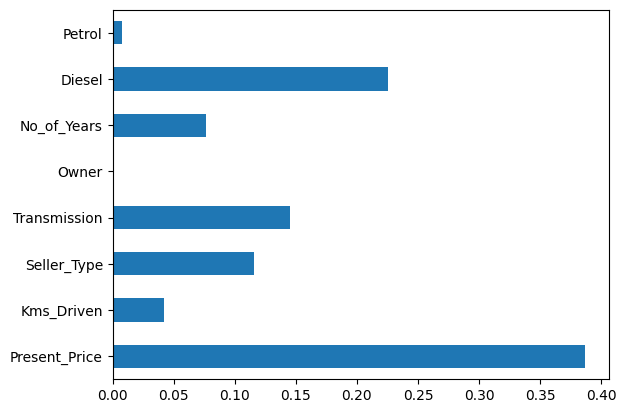

In [52]:
#Plot Features Importance

ft_importances = pd.Series(model.feature_importances_,index=X.columns)
ft_importances.plot(kind='barh')

### Observations
    1. Present Price is the most importance Feature
    2. Petrol is the least importance feature

In [53]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X,y)

RandomForestRegressor()

In [54]:
rf.score(X_train,y_train)

0.9830359288872309

In [55]:
rf.score(X_test,y_test)

0.9961544746321118

In [56]:
predictions = rf.predict(X_test)
predictions

array([ 0.3903, 10.4882,  5.0675,  0.1752,  7.047 ,  7.2725,  1.1025,
        0.5437,  0.4571,  6.2   ,  8.818 ,  1.0996,  6.9972,  0.4243,
        5.8342,  2.818 ,  1.0375, 16.3329,  0.472 ,  1.64  ,  0.4159,
        8.359 ,  5.0945,  2.8755,  0.562 ,  3.599 ,  5.092 ,  2.877 ,
        1.2056,  1.1928,  0.577 ,  8.2255,  0.4629,  2.178 ,  7.848 ,
        3.8655,  5.8205,  4.1992,  2.915 ,  5.4595,  3.5469,  2.1789,
        4.675 ,  0.4735,  6.7035,  0.6492,  6.8161,  5.6786,  3.5895,
        3.2705,  5.1688,  1.4465, 22.8829, 22.1998,  7.6715, 10.5989,
        5.366 ,  9.3756,  2.2613,  7.0844,  0.2759,  0.2351,  0.7754,
        0.2833,  4.106 ,  1.1625, 21.0268, 22.6546,  6.6235,  0.3783,
        3.207 ,  3.751 ,  5.6245,  4.5445,  2.3765,  1.1402,  0.7709,
       11.5494,  0.2499,  9.7074,  5.2805,  2.993 ,  3.8341, 18.4806,
        2.8225,  0.4492,  1.0925,  2.756 ,  0.3436, 15.5898,  1.1466])

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Selling_Price', ylabel='Density'>

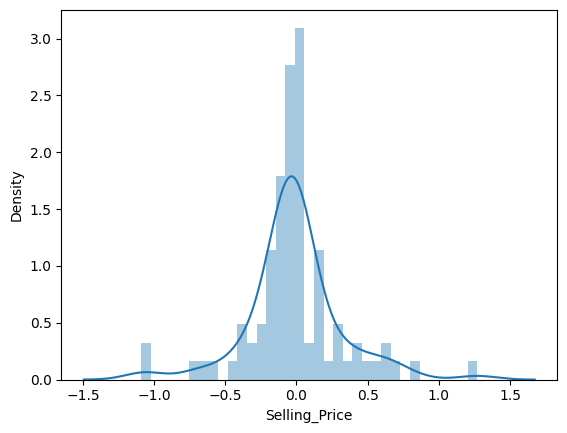

In [57]:
sns.distplot(y_test-predictions) #Here y_test vlaues are the original one

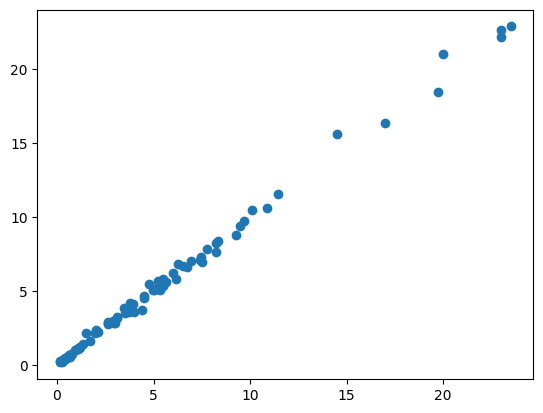

In [59]:
plt.scatter(y_test,predictions) ##If the predictions is in straight line the prediction is good

In [60]:
#Dump into Pickle

import pickle

file = open('random_forest_regression_model.pkl','wb')

pickle.dump(rf, file)